In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('top50.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


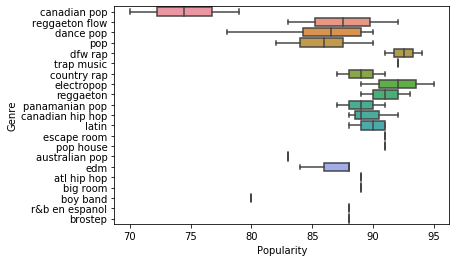

In [4]:
sns.boxplot(
    y=df['Genre'],
    x=df['Popularity'],
)

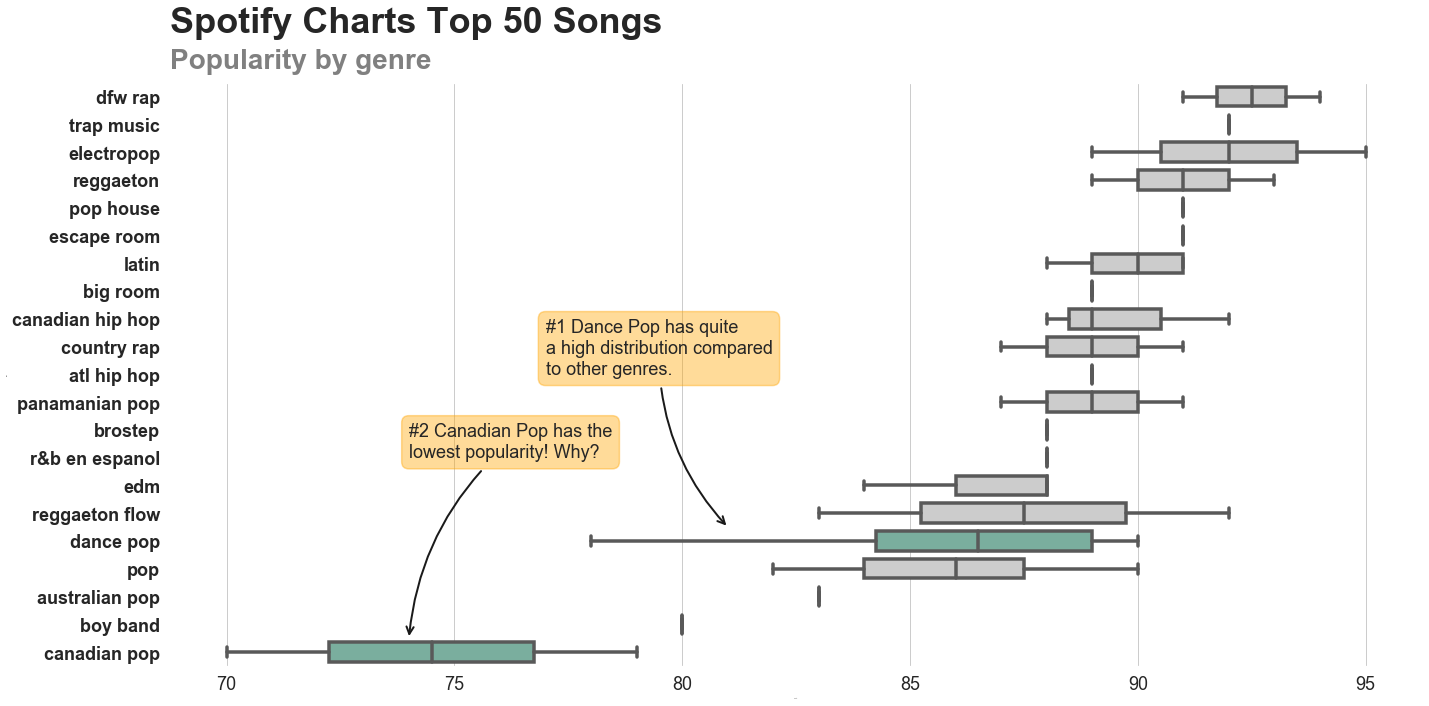

In [5]:
plt.style.use('fivethirtyeight')
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(20,10))
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')


plt.title("Spotify Charts Top 50 Songs", loc='left', fontsize=36, pad=50, weight='semibold')
fig.text(
    0.08, .9, "Popularity by genre",
    horizontalalignment='left', size='medium', color='gray', weight='semibold',fontsize=28
)


plt.tick_params(labelsize=18)
plt.yticks(fontweight="bold")
plt.xlabel("", fontsize=0)
plt.ylabel("", fontsize=0)

sorted_nb = df.groupby(['Genre'])['Popularity'].median().sort_values(ascending=False)

sns.set_context("talk", font_scale=1.4)

custom_palette = {}
for genre in list(sorted_nb.index):
    if genre == 'canadian pop':
        custom_palette[genre] = '#72b6a1'
    elif genre == 'dance pop':
        custom_palette[genre] = '#72b6a1'
    else:
        custom_palette[genre] = '#cccccc'

splot = sns.boxplot(
    y=df['Genre'],
    x=df['Popularity'],
    order=list(sorted_nb.index),
    palette=custom_palette,
    orient="h",
    linewidth=3.5,
    width=.7
)

ax.annotate('#1 Dance Pop has quite\na high distribution compared\nto other genres.',
            xy=(81, 15.5), xycoords='data',
            xytext=(77, 10), textcoords='data',
            arrowprops=dict(arrowstyle="->", fc='k', ec='k', connectionstyle="arc3,rad=.2", linewidth=2),
            fontsize=18,
            bbox=dict(boxstyle="round", facecolor="orange", edgecolor="orange", pad=0.4, alpha=0.4))

ax.annotate('#2 Canadian Pop has the\nlowest popularity! Why?',
            xy=(74, 19.5), xycoords='data',
            xytext=(74, 13), textcoords='data',
            arrowprops=dict(arrowstyle="->", fc='k', ec='k', connectionstyle="arc3,rad=.2", linewidth=2),
            fontsize=18,
            bbox=dict(boxstyle="round", facecolor="orange", edgecolor="orange", pad=0.4, alpha=0.4))



plt.show()

In [6]:
def my_boxplot(
    df, x, y,
    title='My title', subtitle='',
    highlights=[], annotations=[]
):

    plt.style.use('fivethirtyeight')
    sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
    sns.set_style('whitegrid')

    fig, ax = plt.subplots(figsize=(20,10))
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    
    if (subtitle==''):
        subtitle = '{} by {}'.format(y, x)

    plt.title(title, loc='left', fontsize=36, pad=50, weight='semibold')
    fig.text(
        0.08, .9, subtitle,
        horizontalalignment='left', size='medium', color='gray', weight='semibold',fontsize=28
    )

    plt.tick_params(labelsize=18)
    plt.yticks(fontweight="bold")
    plt.xlabel("", fontsize=0)
    plt.ylabel("", fontsize=0)

    sorted_nb = df.groupby([x])[y].median().sort_values(ascending=False)

    sns.set_context("talk", font_scale=1.4)

    custom_palette = {}
    for genre in list(sorted_nb.index):
        if genre in highlights:
            custom_palette[genre] = '#72b6a1'
        else:
            custom_palette[genre] = '#cccccc'

    splot = sns.boxplot(
        y=df[x],
        x=df[y],
        order=list(sorted_nb.index),
        palette=custom_palette,
        orient="h",
        linewidth=3.5,
        width=.7
    )
    
    for annotation in annotations:
        ax.annotate(annotation['text'],
                    xy=annotation['xy'], xycoords='data',
                    xytext=annotation['xytext'], textcoords='data',
                    arrowprops=dict(arrowstyle="->", fc='k', ec='k', connectionstyle="arc3,rad=.2", linewidth=2),
                    fontsize=18,
                    bbox=dict(boxstyle="round", facecolor="orange", edgecolor="orange", pad=0.4, alpha=0.4))

    return plt


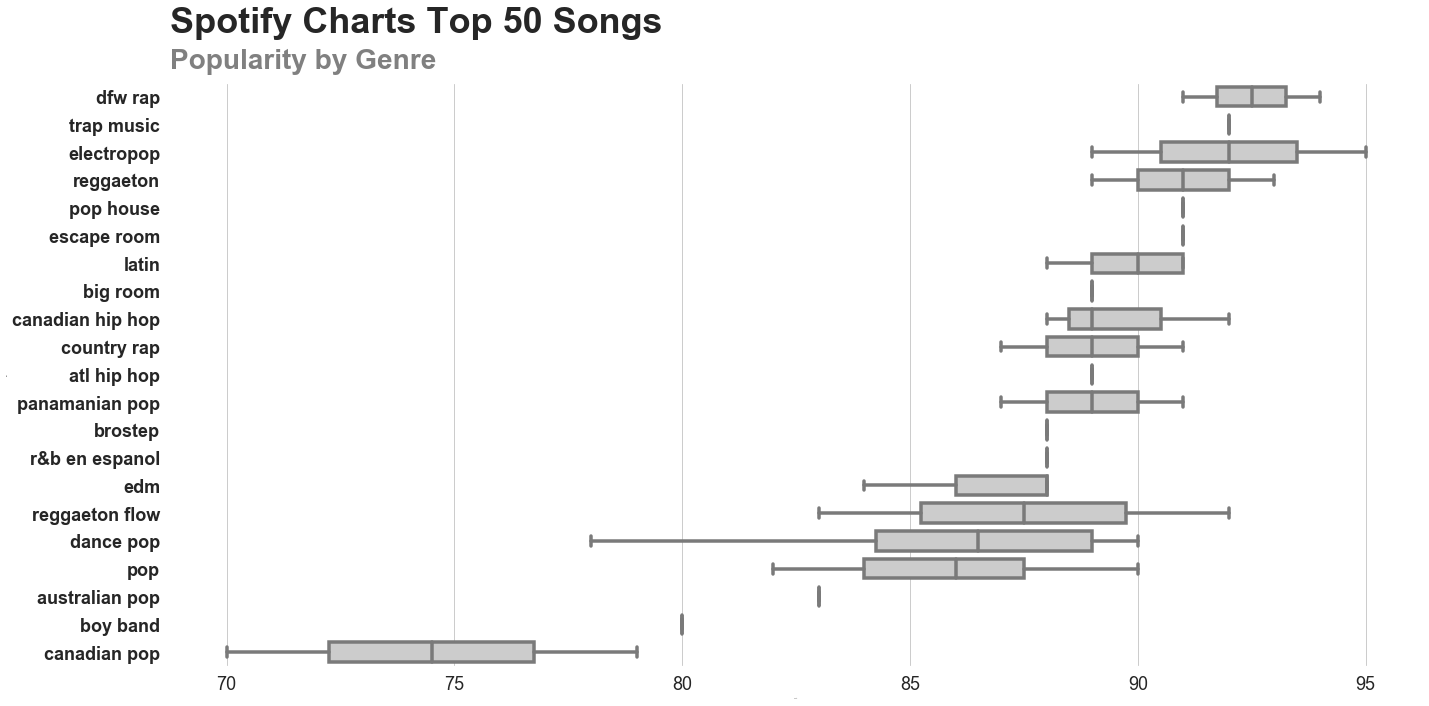

In [7]:
my_boxplot(
    df, 'Genre', 'Popularity',
    title='Spotify Charts Top 50 Songs',
).show()

In [8]:
from MyCharts import boxplot

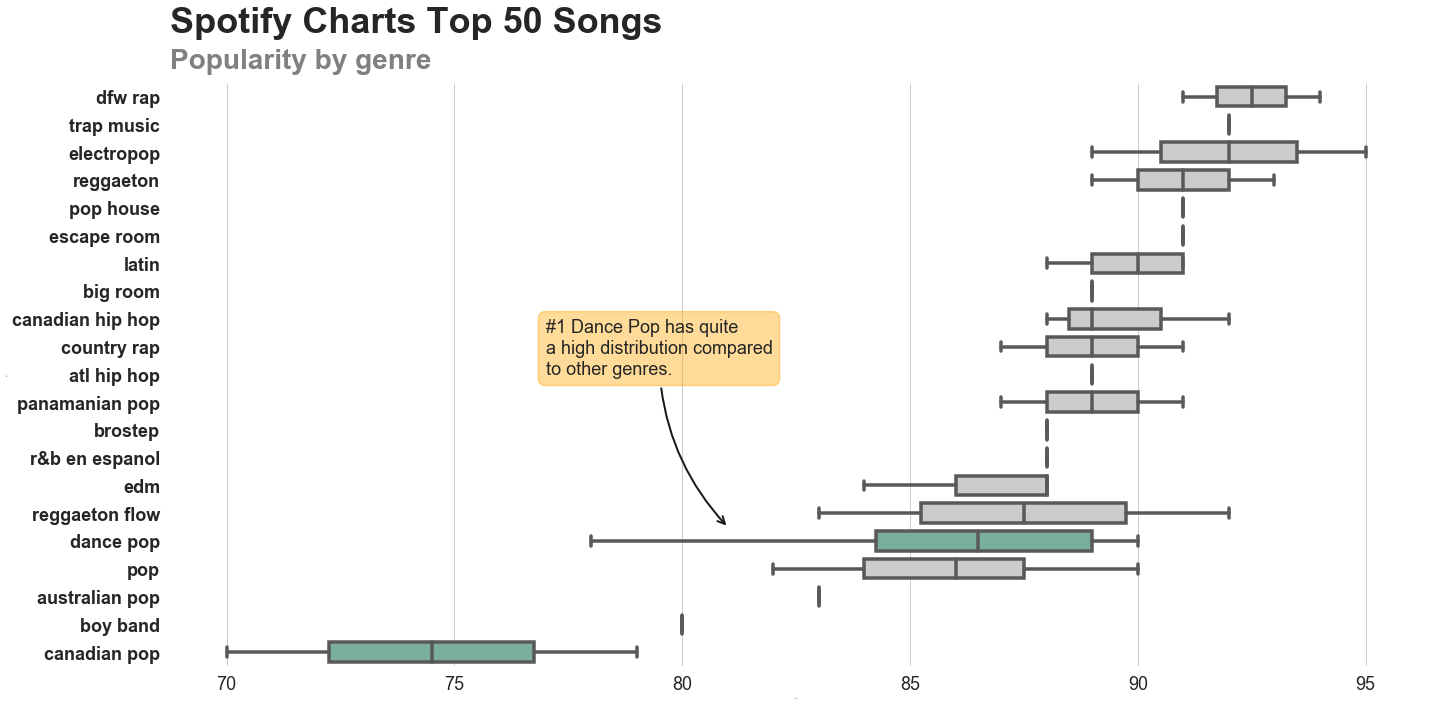

In [9]:
boxplot(
    df, x='Genre', y='Popularity',
    title='Spotify Charts Top 50 Songs',
    subtitle='Popularity by genre',
    highlights=['canadian pop', 'dance pop'],
    annotations=[
        {
            'text': '#1 Dance Pop has quite\na high distribution compared\nto other genres.',
            'xy': (81, 15.5), 'xytext': (77, 10)
        },
    ]
).show()